# Clustering 

### Problem Statement:-
 
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
        
NGO have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.

NGO wants to split into clusters and find out the needs based on the variables [gdpp, child_mort and income].

Report back at least 5 countries which are in direst need of aid from the analysis


    

In [1]:
#importing required packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading and understanding  the data

In [2]:
#Reading the dataset
country_df=pd.read_csv("Country-data.csv",header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Describing the data 
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
#Shape of the dataframe
country_df.shape

(167, 10)

In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Clean the data

In [6]:
## finding the missing  values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
#finding duplicate values
country_df[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#####    1) There is no missing data in the given dataset 2) There is no duplicate value

#  Buliding EDA model

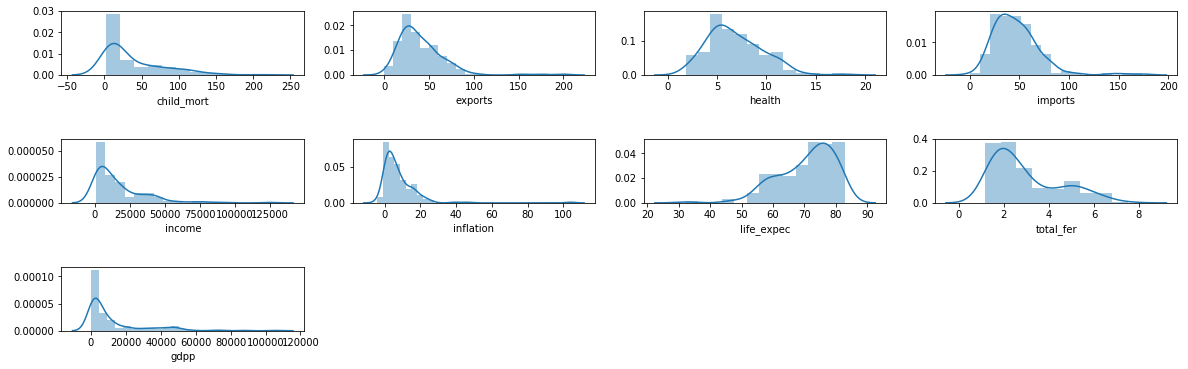

In [8]:
#Plotting the bar chart 
plt.figure(figsize = (20, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.subplots_adjust(hspace=1)
    sns.distplot(country_df[i[1]])

# Prepare the data for modelling

In [9]:
# Recalculating the values for exports health imports 
country_df['exports']=(country_df['exports']/100)*country_df['gdpp']
country_df['health']=(country_df['health']/100)*country_df['gdpp']
country_df['imports']=(country_df['imports']/100)*country_df['gdpp']
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
#Analysis  on outliers
country_df.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


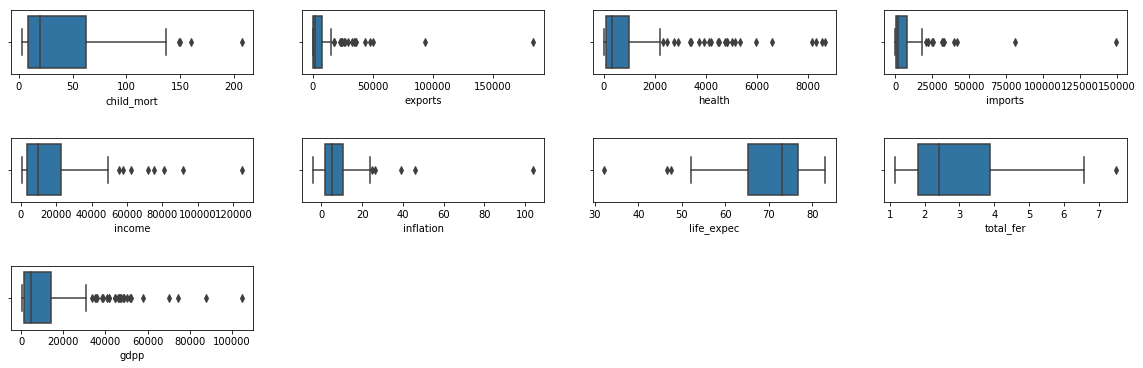

In [11]:
#Plotting the bar chart 
plt.figure(figsize = (20, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.subplots_adjust( hspace=1)
    sns.boxplot(country_df[i[1]])

In [12]:
#removing the outliers
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
        print(f"Capping outlier for the column {i[1]} ")
        Q1 = country_df[i[1]].quantile(0.01)
        Q4 = country_df[i[1]].quantile(0.99)
        country_df[i[1]][country_df[i[1]] <= Q1] = Q1
        country_df[i[1]][country_df[i[1]] >= Q4] = Q4


Capping outlier for the column child_mort 
Capping outlier for the column exports 
Capping outlier for the column health 
Capping outlier for the column imports 
Capping outlier for the column income 
Capping outlier for the column inflation 
Capping outlier for the column life_expec 
Capping outlier for the column total_fer 
Capping outlier for the column gdpp 


###### Since data set contains less number of rows i have applied the capping treatment to fix the ouliers

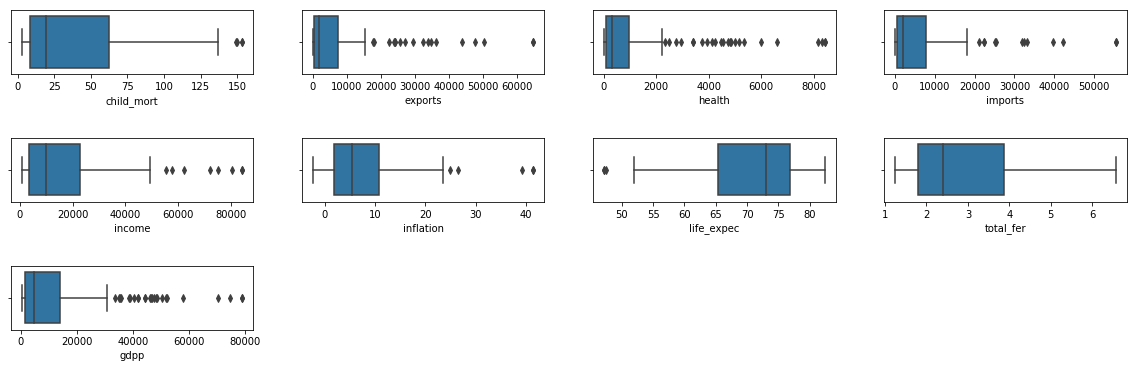

In [13]:
# Box Plot after removing the outliers
plt.figure(figsize = (20, 20))
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(9,4,i[0]+1)
    plt.subplots_adjust( hspace=1)
    sns.boxplot(country_df[i[1]])

# Finding the number of cluster 
    1)elbow-curve
    2)silhouette_score

In [14]:
country_df_kmeans=country_df.copy()
country_df_hier=country_df.copy()
country_df_kmeans.drop('country',axis=1,inplace=True)
country_df_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [15]:
#rescaling of the columns
scalar=StandardScaler()
data_df_scaled=scalar.fit_transform(country_df_kmeans)

In [16]:
#restructuring to dataframe
data_df_scaled=pd.DataFrame(data_df_scaled)
data_df_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
data_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


### Hopkins Statics
The Hopkins statistic is a way of measuring the cluster tendency of a data set. It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(data_df_scaled)

0.8610717950146617

## Elbow-curve

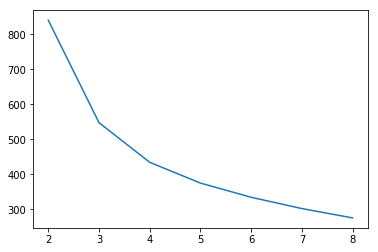

In [19]:
# elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state = 100)
    kmeans.fit(data_df_scaled)
    
    ssd.append([num_clusters,kmeans.inertia_])
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])
plt.show()

## silhouette_score

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state = 100)
    kmeans.fit(data_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39450005846699704
For n_clusters=5, the silhouette score is 0.38611500797464143
For n_clusters=6, the silhouette score is 0.30280954105276137
For n_clusters=7, the silhouette score is 0.2936328955041861
For n_clusters=8, the silhouette score is 0.29796016857299135


 # Analysis of finding the number of cluster
1)From the elbow  curve we could find cluster=3 has significate curve.
2)The silhouette score is high for the cluster k=2 but spliting the data into two groups will not give much details to business.So the k values is considered as 3 

In [21]:
# final cluster k=3
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(data_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [22]:
country_df['cluster_id']=kmeans.labels_

In [23]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


## Cluster Profiling

In [24]:
country_df_cp=country_df[['country','gdpp','child_mort','income','cluster_id']]

In [25]:
country_df_cp.cluster_id.value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

#### Visualize the cluster using K- means

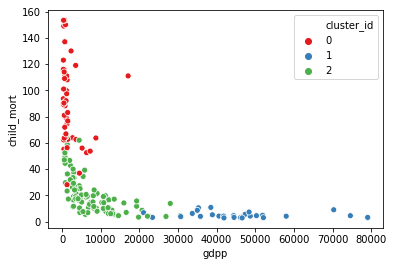

In [26]:
#gdpp vs child_mort
sns.scatterplot( x = 'gdpp' , y = 'child_mort' ,hue = 'cluster_id' , data = country_df_cp, palette= 'Set1')

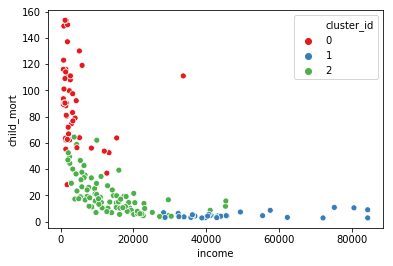

In [27]:
#income vs child_mort
sns.scatterplot( x = 'income' , y = 'child_mort' ,hue = 'cluster_id' , data = country_df_cp , palette= 'Set1')

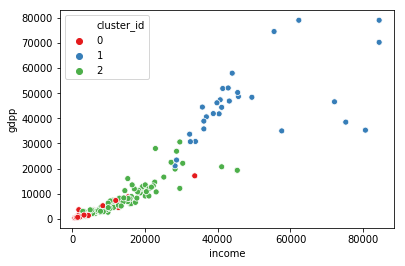

In [28]:
#income vs gdpp
sns.scatterplot( x = 'income' , y = 'gdpp' ,hue = 'cluster_id' , data = country_df_cp , palette= 'Set1')

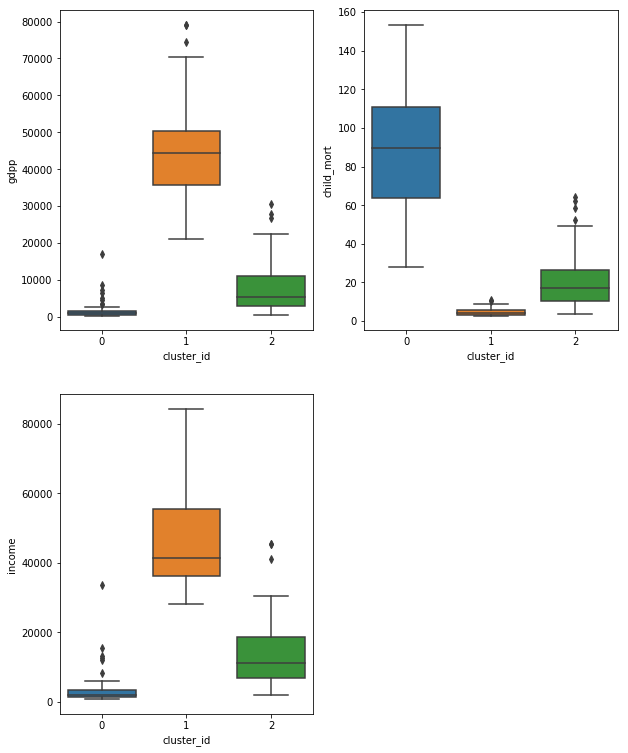

In [29]:
#box plot for 'gdpp','child_mort','income' 
plt.figure(figsize=(10,20))
feature=['gdpp','child_mort','income']
for i  in enumerate (feature):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = "cluster_id",y= i[1], data = country_df_cp)
plt.show()

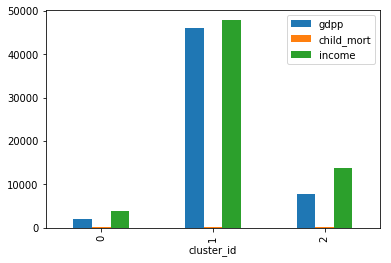

In [30]:
country_df_cp[['gdpp','child_mort','income','cluster_id']].groupby("cluster_id").mean().plot(kind = 'bar')

In [31]:
country_df[country_df['cluster_id']==0].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.300,57.70,6.2600,331.62,0
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.470,60.80,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.800,57.50,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.550,58.80,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.200,55.00,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.790,60.80,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.640,54.50,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.010,47.50,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.100,53.10,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.600,61.70,4.6100,482.00,0


## Hierarchical Clustering

In [32]:
data_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


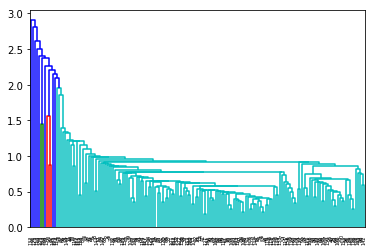

In [33]:
mergings = linkage(data_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

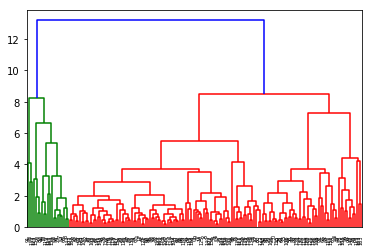

In [34]:
mergings = linkage(data_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [35]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [36]:
country_df_hier['cluster_id'] = cluster_labels
country_df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


#### Visualize the cluster using Hierarchical Clustering

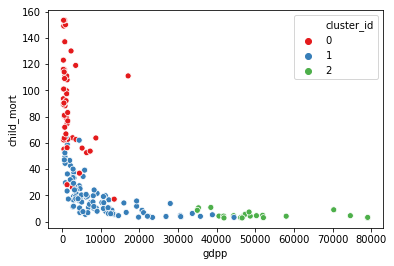

In [37]:
#gdpp vs child_mort
sns.scatterplot( x = 'gdpp' , y = 'child_mort' ,hue = 'cluster_id' , data = country_df_hier, palette= 'Set1')

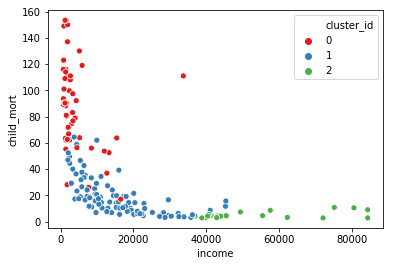

In [38]:
#income vs child_mort
sns.scatterplot( x = 'income' , y = 'child_mort' ,hue = 'cluster_id' , data = country_df_hier , palette= 'Set1')

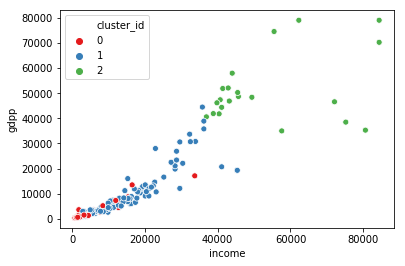

In [39]:
#income vs gdpp
sns.scatterplot( x = 'income' , y = 'gdpp' ,hue = 'cluster_id' , data = country_df_hier , palette= 'Set1')

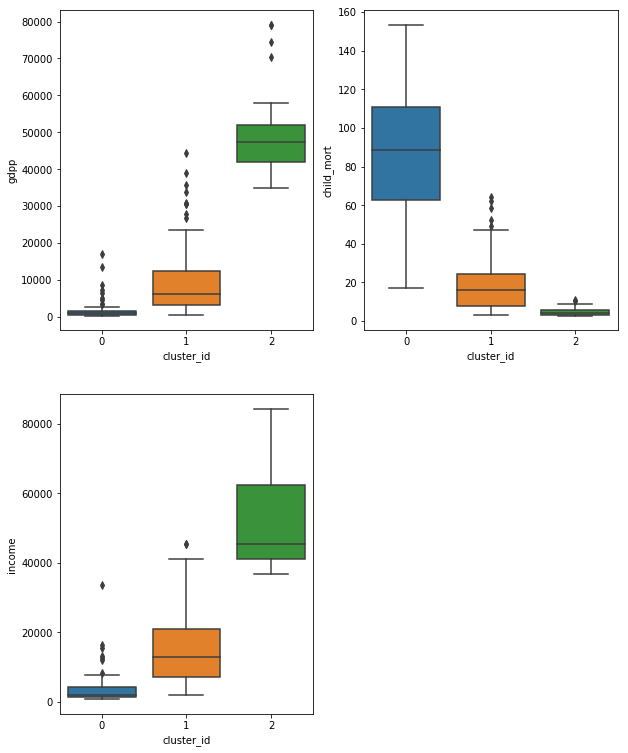

In [40]:
#box plot for 'gdpp','child_mort','income' 
plt.figure(figsize=(10,20))
feature=['gdpp','child_mort','income']
for i  in enumerate (feature):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = "cluster_id",y= i[1], data = country_df_hier)
plt.show()

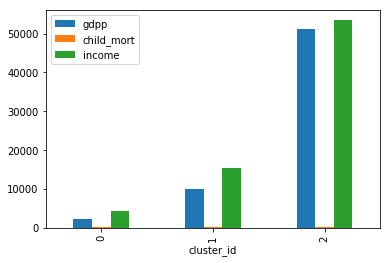

In [41]:
country_df_hier[['gdpp','child_mort','income','cluster_id']].groupby("cluster_id").mean().plot(kind = 'bar')

In [42]:
country_df_hier[country_df_hier['cluster_id']==0].sort_values(by = ['gdpp','child_mort','income'], 
                                                              ascending = [True, False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.300,57.70,6.2600,331.62,0
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.470,60.80,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.800,57.50,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.550,58.80,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.200,55.00,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.790,60.80,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.640,54.50,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.010,47.50,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.100,53.10,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.600,61.70,4.6100,482.00,0


In [43]:
country_df_hier.cluster_id.value_counts()

1    96
0    50
2    21
Name: cluster_id, dtype: int64

##  Analysis Report

Based on the both K-Means and Hierarchical Clustering the top five countries which are in direst need of aid are listed below

### Countries listed below are in direst need of aid
1)Burundi
2)Liberia
3)Congo, Dem. Rep.
4)Niger
5)Sierra Leone